<a href="https://colab.research.google.com/github/Lulekwa/Deep-Learning/blob/main/RestaurantRatingsPredictionAnalysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 

<ipython-input-9-a67927392ab5>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna('Unknown', inplace=True)
<ipython-input-9-a67927392ab5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Average Cost for two', 'Votes']] = scaler.fit_transform(X[['Average Cost 

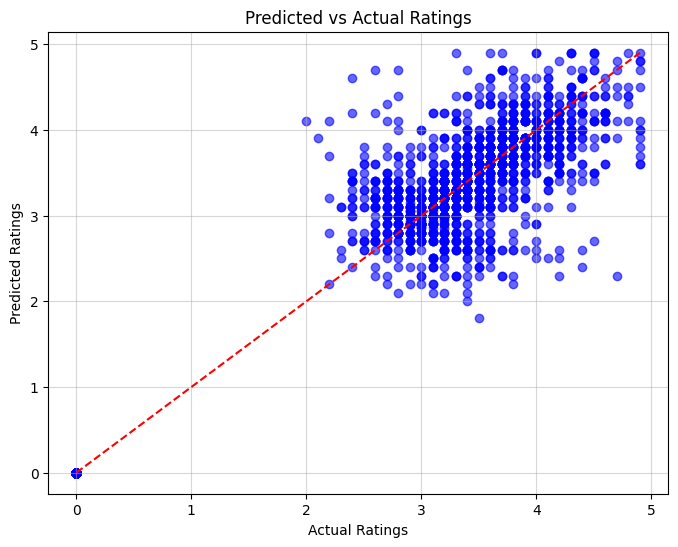

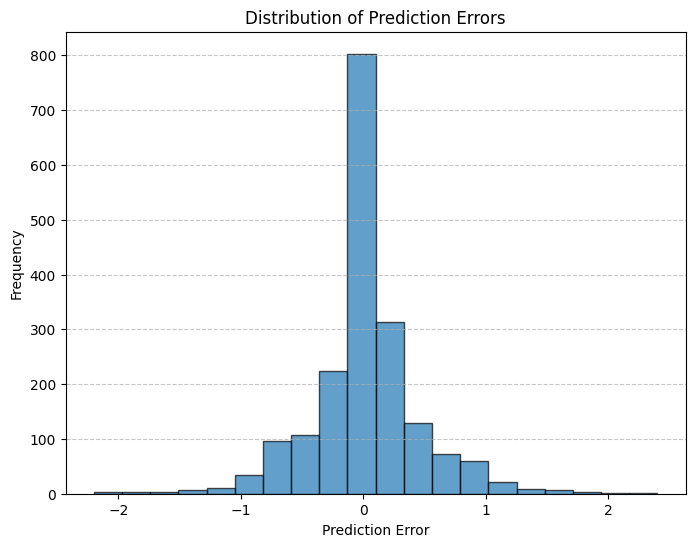

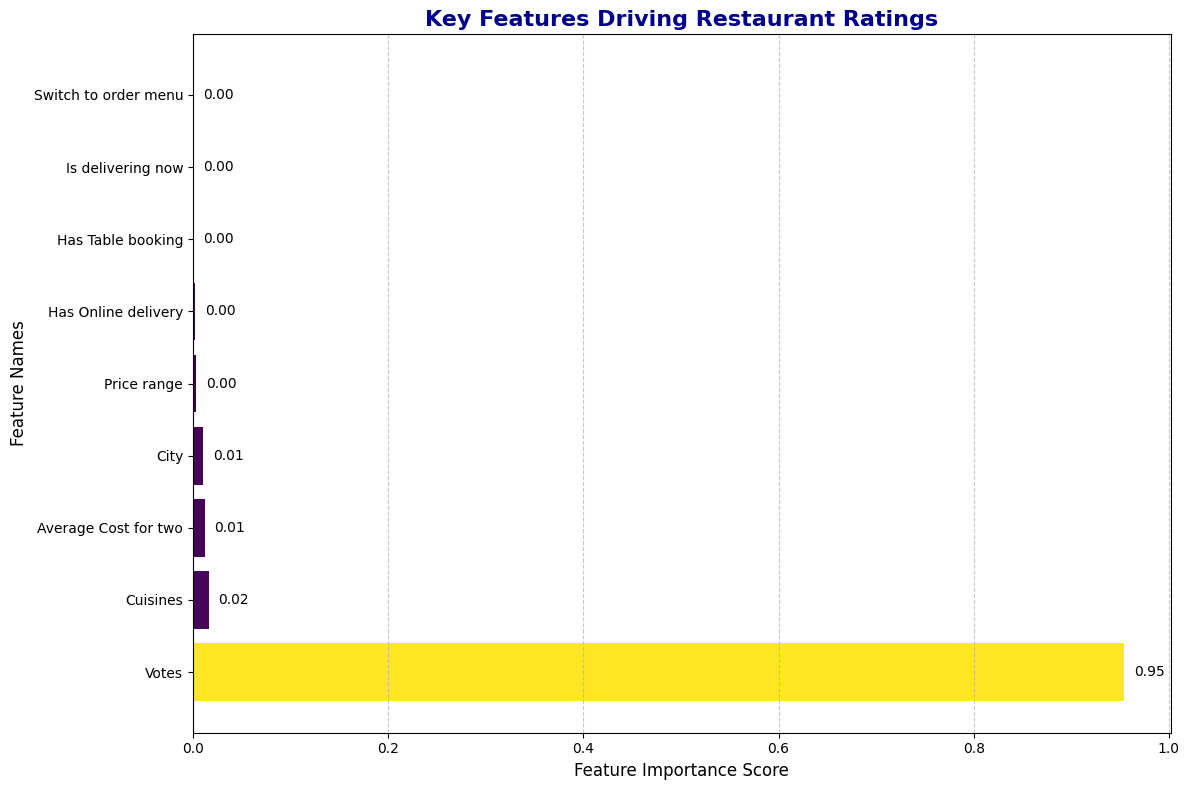


### Task Complete ###
Model trained, evaluated, and feature importance visualized. Scripted by Lulekwa Mnisi.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"/content/Dataset.csv"
data = pd.read_csv(file_path)

# Step 2: Initial Dataset Exploration
print("### Dataset Overview ###")
print(data.info())
print("\nFirst Look at the Data:")
print(data.head())

# Step 3: Handle Missing Data
# Replace missing values in 'Cuisines' with 'Unknown' to retain as much data as possible
data['Cuisines'].fillna('Unknown', inplace=True)

# Step 4: Encode Text Columns
# Convert categorical text columns into numerical values for model training
categories_to_encode = ['City', 'Cuisines', 'Currency', 'Has Table booking',
                        'Has Online delivery', 'Is delivering now', 'Switch to order menu']
encoders = {}

for column in categories_to_encode:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder

# Step 5: Define Features (X) and Target (y)
X = data[['City', 'Cuisines', 'Average Cost for two', 'Has Table booking',
          'Has Online delivery', 'Is delivering now', 'Switch to order menu',
          'Price range', 'Votes']]
y = data['Aggregate rating']

# Standardize numerical features for better performance
scaler = StandardScaler()
X[['Average Cost for two', 'Votes']] = scaler.fit_transform(X[['Average Cost for two', 'Votes']])

# Step 6: Split the Data
# Use an 80-20 split to create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Completed:")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

# Step 7: Build the Model
# Decision Tree Regressor is chosen for this task
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict and calculate evaluation metrics
predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Calculate additional metrics: RMSE and MAE
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print("\n### Model Performance ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Value (R²): {r_squared:.4f}")

# Step 9: Visualize Predicted vs. Actual Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual Ratings")
plt.grid(alpha=0.5)
plt.show()

# Step 10: Distribution of Prediction Errors
errors = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 11: Identify Key Features
# Analyze and visualize which features influenced the model's predictions the most
feature_importance = regressor.feature_importances_
features = X.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Visualize the feature importance with enhancements
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(sorted_importance / max(sorted_importance))  # Color gradient
bars = plt.barh(sorted_features, sorted_importance, color=colors)

# Annotate each bar with its value
for bar, value in zip(bars, sorted_importance):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', fontsize=10)

# Add labels and titles
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)
plt.title("Key Features Driving Restaurant Ratings", fontsize=16, fontweight='bold', color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Show the most important features at the top

# Display the graph
plt.tight_layout()
plt.show()

print("\n### Task Complete ###")
print("Model trained, evaluated, and feature importance visualized. Scripted by Lulekwa Mnisi.")